In [1]:
%load_ext autoreload
%autoreload 2

from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.cluster import KMeans
from plot_map import plot_map

In [2]:
ds_solar = xr.open_dataset(path_data / 'Solar_forcing_1st_mill.nc')
ds_volc = xr.open_dataset(path_data / 'Volc_Forc_AOD_1st_mill.nc')
ds_temp_r1 = xr.open_dataset(path_data / 'T2m_R1_ym_1stMill.nc')
ds_temp_r2 = xr.open_dataset(path_data / 'T2m_R2_ym_1stMill.nc')

In [8]:
aod = ds_volc.AOD.values.flatten()
mean_year_temp = np.mean(np.mean(ds_temp_r1.T2m.values, axis=1), axis=1)

min_temp = np.min(ds_temp_r1.variables['T2m'].values, axis=0)
max_temp = np.max(ds_temp_r1.variables['T2m'].values, axis=0)
mean_temp = np.mean(ds_temp_r1.variables['T2m'].values, axis=0)

diff_max = np.max(max_temp - mean_temp)
diff_min = np.min(min_temp - mean_temp)

def plot_map_year(year_idx):
    # https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
    temp = ds_temp_r1.variables['T2m'][year_idx, :, :]
    temp = temp - mean_temp

    return plot_map(temp, title=f'Year {year_idx+1}, aod={aod[year_idx]:.2}, mean_temp={mean_year_temp[year_idx]:.6}', colorbar_title='temp - mean_temp')

    
year_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=998,
    step=1,
    description='Year index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

interact(plot_map_year, year_idx=year_slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Year index:', max=998), Output(…

<function __main__.plot_map_year(year_idx)>

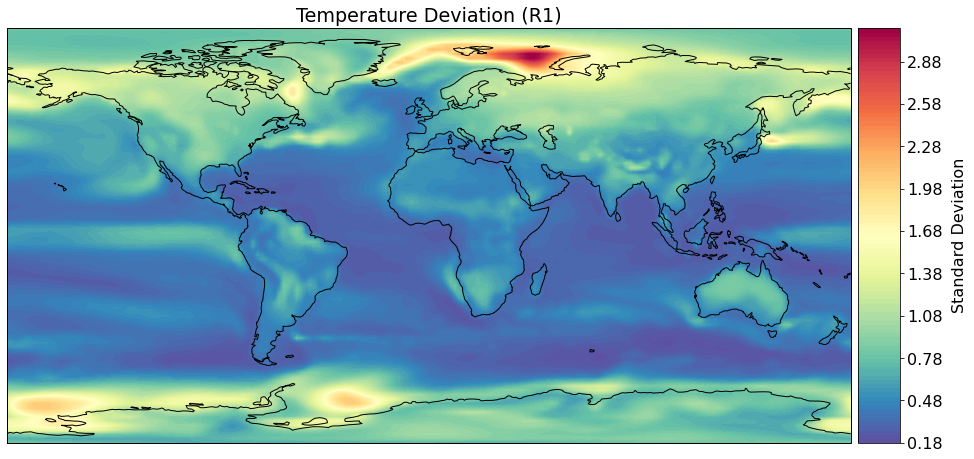

In [4]:
temp_std = np.std(ds_temp_r1['T2m'].values, axis=0)
fig = plot_map(temp_std, title='Temperature Deviation (R1)', colorbar_title='Standard Deviation')
fig.savefig('../results/map_std.png', dpi=300, bbox_inches='tight')
fig

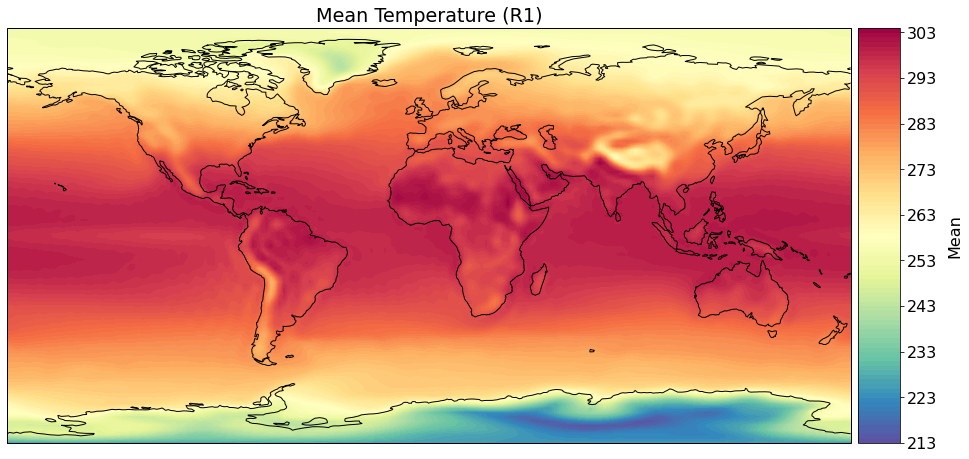

In [95]:
temp_mean = np.mean(ds_temp_r1['T2m'].values, axis=0)
fig = plot_map(temp_mean, title='Mean Temperature (R1)', colorbar_title='Mean')
fig.savefig('../results/map_mean.png', dpi=300, bbox_inches='tight')
fig